In [8]:
%load_ext autoreload
%autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
np.set_printoptions(legacy='1.25')
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit,fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['errorbar.capsize'] = 6
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# mpl.rcParams.update({"axes.grid" : True})
import util as yu
yu.flag_fast=False

enss=['b','c','d']
ens2full={'a24':'cA211.53.24','a':'cA2.09.48','b':'cB211.072.64','c':'cC211.060.80','cD211.054.96':'D96'}
ens2label={'a24':'A24','a':'A48','b':'B64','c':'C80','d':'D96'}
ens2a={'a24':0.0908,'a':0.0938,'b':0.07957,'c':0.06821,'d':0.05692} # fm
ens2N={'a24':24,'a':48,'b':64,'c':80,'d':96}
ens2N_T={'a24':24*2,'a':48*2,'b':64*2,'c':80*2,'d':96*2}

# ens2mN={'a':931}
# ens2mpiC={'a':131}
# ens2mpi0={'a':111}

ens2amu={'a24':0.0053,'a':0.0009,'b':0.00072}
ens2amus={'b':0.0186}
ens2amuc={'b':0.249}
ens2ZP={'a24':(0.4670,0.0046),'a':(0.500,0.030)}

hbarc = 1/197.3
ens2aInv={ens:1/(ens2a[ens]*hbarc) for ens in enss} # MeV

ens2tfs={'b':range(3,26+1),'c':range(2,28+1),'d':range(2,32+1)}

def fsolve2(func,x0):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res=fsolve(func, x0)[0]
    return res if res!=x0 else np.NaN

# ens='b'
# ens2a[ens]*hbarc*1000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data={}

flas=['j+','js','jc']
for ens in enss:
    print(ens)
    data[ens]={}
    tfs=ens2tfs[ens]

    path=f'/p/project/ngff/li47/code/projectData/02_discNJN_1D/{ens2full[ens]}/data_earlytest/test_avg.h5'
    with h5py.File(path) as f:
        data[ens]['N0']=yu.jackknife(f['N_mom0'])
        data[ens]['N1']=yu.jackknife(f['N_mom1'])
        
        data[ens]['P44']={}
        data[ens]['P4i']={}
        for fla in flas:
            data[ens]['P44'][fla]={}
            data[ens]['P4i'][fla]={}
            for tf in tfs:
                data[ens]['P44'][fla][tf]=yu.jackknife(f[f'{fla}/P44(G0,0,0)/{tf}'])
                data[ens]['P4i'][fla][tf]=yu.jackknife((f[f'{fla}/P4i(G0,pi,pi)/{tf}'][:]+f[f'{fla}/P4i(G0,pi,pi)_bw/{tf}'])/2)

b
c


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/p/project/ngff/li47/code/projectData/02_discNJN_1D/cC211.060.80/data_earlytest/test_avg.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# tfs=[6]
# flas=['j+']
# data={}
# path='/p/project/ngff/li47/code/projectData/02_discNJN_1D/cB211.072.64/data_earlytest/test.h5'
# with h5py.File(path) as f:
#     data['N0']=yu.jackknife(f['N_mom0'])
#     data['N1']=yu.jackknife(f['N_mom1'])
    
#     for mom in [(1,0,0),(-1,0,0),(0,1,0),(0,-1,0),(0,0,1),(0,0,-1)]:
#         data[f'N_{mom}']=yu.jackknife(f[f'N_mom_{mom}'])
    
#     data['P44']={}
#     data['P4i']={}
#     data['P4i_bw']={}
#     for fla in flas:
#         data['P44'][fla]={}
#         data['P4i'][fla]={}
#         data['P4i_bw'][fla]={}
#         for tf in tfs:
#             data['P4i'][fla][tf]={}
#             data['P4i_bw'][fla][tf]={}
#             for name in ['txp','txn','typ','tyn','tzp','tzn']:
#                 data['P4i'][fla][tf][name]=yu.jackknife(f[f'{fla}/P4i(G0,pi,pi)/{name}/{tf}'])
#                 data['P4i_bw'][fla][tf][name]=yu.jackknife(f[f'{fla}/P4i(G0,pi,pi)_bw/{name}/{tf}'])

[4.62270854e-10 5.52925386e-10 5.74462557e-10 7.63145888e-10
 1.14461657e-09 5.55854503e-10 3.62485287e-10]
[1.7222345e-09]
1.7220421889889483e-09
[0.04473557 0.05350853 0.05559275 0.0738523  0.11076856 0.05379199
 0.03507897]

[4.62270854e-10 5.52925386e-10 5.74462557e-10 7.63145888e-10
 1.14461657e-09 5.55854503e-10 3.62485287e-10]
[1.7222906e-09]
[0.26840467 0.3210407  0.33354565 0.44309936 0.66458967 0.32274141
 0.21046697]
[0.26473045 0.32427384 0.33344993 0.43991409 0.66932091 0.32183057
 0.19729186]


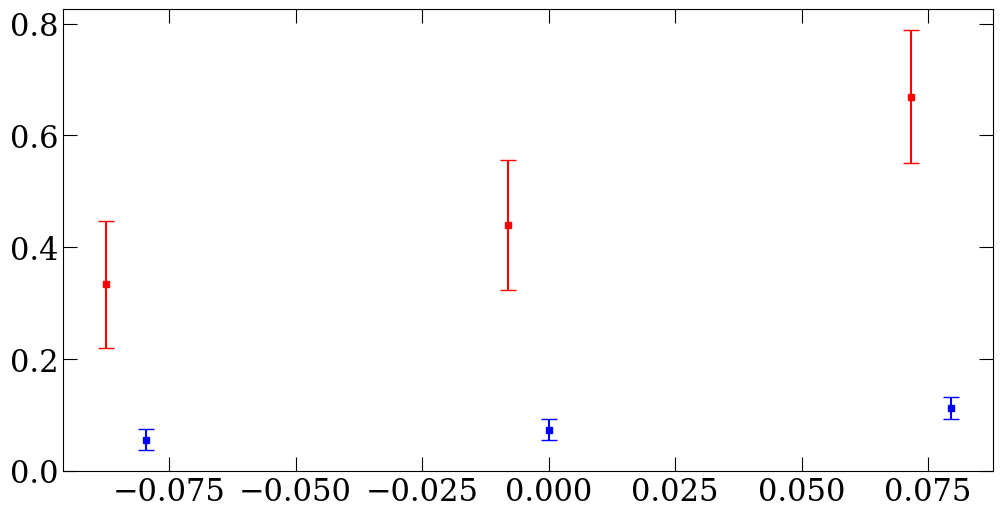

In [ ]:
# xunit=ens2a[ens]; yunit=1
# fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=12)
# tfs_plt=[6]
# t_cut=2

# cN1=np.real(data['N1'])

# j='j+'
# ax=axs[0,0]
# # ax.set_ylim([0,0.2])
# colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
# for i_tf,tf in enumerate(tfs_plt):
#     c3pt_xp=np.real(data['P4i'][j][tf]['txp']/(1j*2*np.pi/ens2N[ens]))
#     c3pt_xn=np.real(data['P4i'][j][tf]['txn']/(1j*2*np.pi/ens2N[ens]))
#     c3pt_yp=np.real(data['P4i'][j][tf]['typ']/(1j*2*np.pi/ens2N[ens]))
#     c3pt_yn=np.real(data['P4i'][j][tf]['tyn']/(1j*2*np.pi/ens2N[ens]))
#     c3pt_zp=np.real(data['P4i'][j][tf]['tzp']/(1j*2*np.pi/ens2N[ens]))
#     c3pt_zn=np.real(data['P4i'][j][tf]['tzn']/(1j*2*np.pi/ens2N[ens]))
#     c3pt=c3pt_xp+c3pt_xn+c3pt_yp+c3pt_yn+c3pt_zp+c3pt_zn
    
#     print(c3pt[0])
    
#     c2pt_xp=np.real(data[f'N_{(1,0,0)}'])[:,tf:tf+1]
#     c2pt_xn=np.real(data[f'N_{(-1,0,0)}'])[:,tf:tf+1]
#     c2pt_yp=np.real(data[f'N_{(0,1,0)}'])[:,tf:tf+1]
#     c2pt_yn=np.real(data[f'N_{(0,-1,0)}'])[:,tf:tf+1]
#     c2pt_zp=np.real(data[f'N_{(0,0,1)}'])[:,tf:tf+1]
#     c2pt_zn=np.real(data[f'N_{(0,0,-1)}'])[:,tf:tf+1]
#     c2pt=c2pt_xp+c2pt_xn+c2pt_yp+c2pt_yn+c2pt_zp+c2pt_zn
    
#     print(c2pt[0]/6)
#     t=np.real(data['N1'])
#     print(t[0,6])
    
#     ratio=[(c3pt/c2pt)]
#     ratio=np.mean(ratio,axis=0)
#     print(ratio[0])
    
#     mean,err=yu.jackme(ratio)
#     tcs=np.arange(t_cut,tf-t_cut+1)
#     plt_x=(tcs-tf/2+0.1*(tf-6)+ (0.5 if tf%2!=0 else 0))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
#     ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf])  
    
#     ratio=[c3pt_xp/c2pt_xp,c3pt_xn/c2pt_xn,c3pt_yp/c2pt_yp,c3pt_yn/c2pt_yn,c3pt_zp/c2pt_zp,c3pt_zn/c2pt_zn]
#     ratio=np.mean(ratio,axis=0)
    
#     # mean,err=yu.jackme(ratio)
#     # tcs=np.arange(t_cut,tf-t_cut+1)
#     # plt_x=(tcs-tf/2+0.1*(tf-6)+ (0.5 if tf%2!=0 else 0) -0.1)*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
#     # ax.errorbar(plt_x,plt_y,plt_yerr,color='r')  

# print()
# path='/p/project/ngff/li47/code/projectData/02_discNJN_1D/cB211.072.64/data_earlytest/test_fwd.h5'
# with h5py.File(path) as f:
#     t=yu.jackknife(f['j+/P4i(G0,pi,pi)/6'])
#     c3pt=np.real(t/(1j*2*np.pi/ens2N[ens]))
#     print(c3pt[0])
    
#     t=np.real(yu.jackknife(f['N_mom1']))
#     c2pt=t[:,6:6+1]
#     print(c2pt[0])
    
#     ratio=c3pt/c2pt
#     print(ratio[0])
#     mean,err=yu.jackme(ratio)
#     print(mean)
#     tcs=np.arange(t_cut,tf-t_cut+1)
#     plt_x=(tcs-tf/2+0.1*(tf-6)+ (0.5 if tf%2!=0 else 0) -0.1)*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
#     ax.errorbar(plt_x,plt_y,plt_yerr,color='r')  

In [48]:
path='/p/project/ngff/li47/code/projectData/02_discNJN_1D/cB211.072.64/data_earlytest/test_fwd.h5'
with h5py.File(path) as f:
    t=yu.jackknife(f['j+/P4i(G0,pi,pi)/6'])
    c3pt=np.real(t/(1j*2*np.pi/ens2N[ens]))
    print(c3pt[0])
    
    t=np.real(yu.jackknife(f['N_mom1']))
    c2pt=t[:,6]
    print(c2pt[0])

[4.62270854e-10 5.52925386e-10 5.74462557e-10 7.63145888e-10
 1.14461657e-09 5.55854503e-10 3.62485287e-10]
1.7222906e-09


<ErrorbarContainer object of 3 artists>

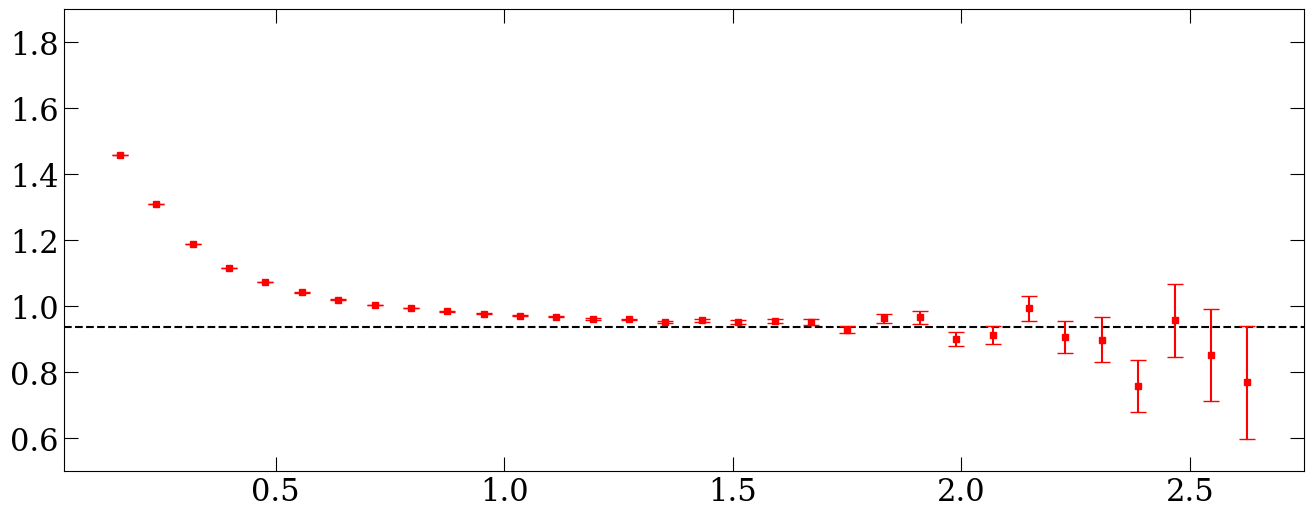

In [70]:
xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=16)
ax=axs[0,0]
ax.set_ylim([0.88,1.08])
ax.set_ylim([0.5,1.9])

mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
ax.axhline(y=mN_exp,color='black',linestyle = '--', marker='')

c2pt_jk=np.real(data['N0'])

func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
mEff_jk=yu.jackmap(func,c2pt_jk)
(mEff_mean,mEff_err)=yu.jackme(mEff_jk)
tmin=1; tmax=32+1
plt_x=(np.arange(tmin,tmax)+1)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
ax.errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')

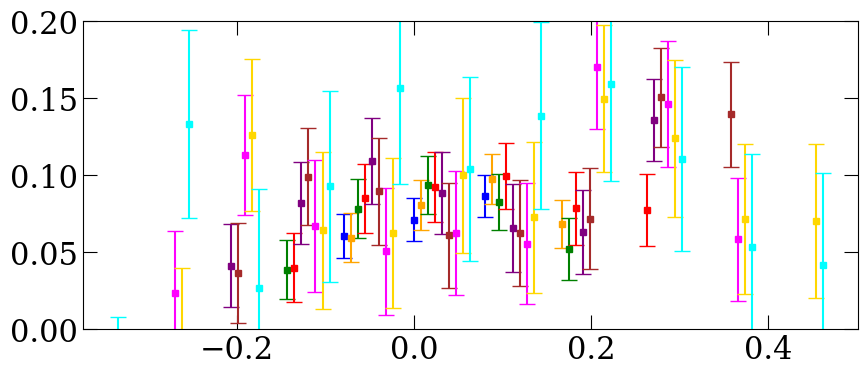

In [72]:
ens='b'
xunit=ens2a[ens]; yunit=1
fix, axs = yu.getFigAxs(1,1,Lrow=4,Lcol=10)
tfs_plt=range(6,14+1,1)
t_cut=2

cN1=np.real(data['N1'])

j='j+'
ax=axs[0,0]
ax.set_ylim([0,0.2])
colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
for i_tf,tf in enumerate(tfs_plt):
    c3pt=np.real(data['P4i'][j][tf]/(1j*2*np.pi/ens2N[ens]))
    # c3pt=np.real(data['P4i'][j][tf]/(1j))
    ratio=c3pt/cN1[:,tf:tf+1]
    
    mean,err=yu.jackme(ratio)
    tcs=np.arange(t_cut,tf-t_cut+1)
    plt_x=(tcs-tf/2+0.1*(tf-6)+ (0.5 if tf%2!=0 else 0))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
    ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf])  

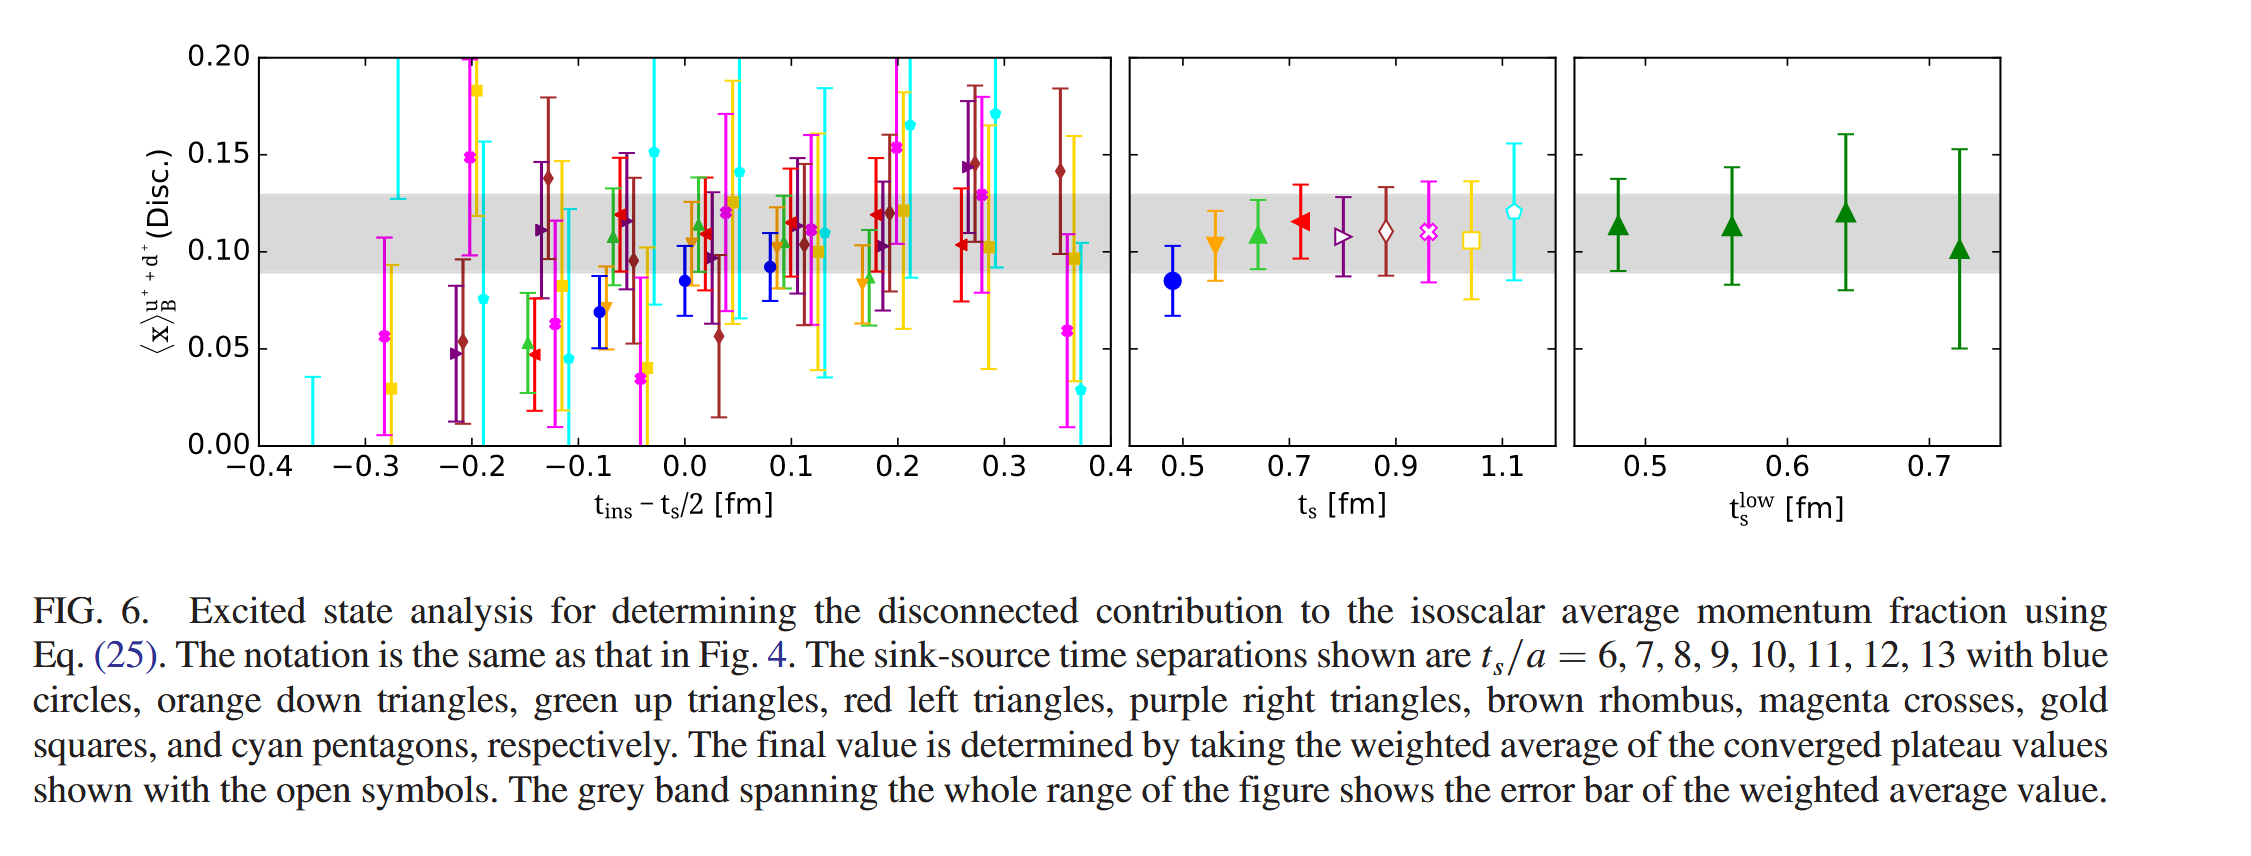

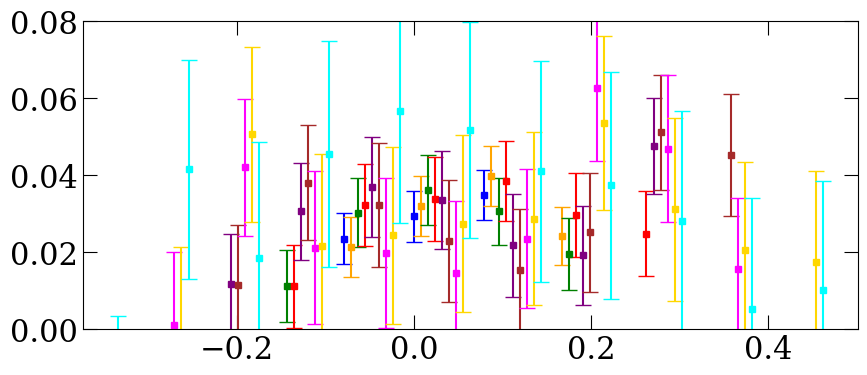

In [74]:
ens='b'
xunit=ens2a[ens]; yunit=1
fix, axs = yu.getFigAxs(1,1,Lrow=4,Lcol=10)
tfs_plt=range(6,14+1,1)
t_cut=2

cN1=np.real(data['N1'])

j='js'
ax=axs[0,0]
ax.set_ylim([0,0.08])
colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
for i_tf,tf in enumerate(tfs_plt):
    c3pt=np.real(data['P4i'][j][tf]/(1j*2*np.pi/ens2N[ens]))
    # c3pt=np.real(data['P4i'][j][tf]/(1j))
    ratio=c3pt/cN1[:,tf:tf+1]
    
    mean,err=yu.jackme(ratio)
    tcs=np.arange(t_cut,tf-t_cut+1)
    plt_x=(tcs-tf/2+0.1*(tf-6)+ (0.5 if tf%2!=0 else 0))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
    ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf])  

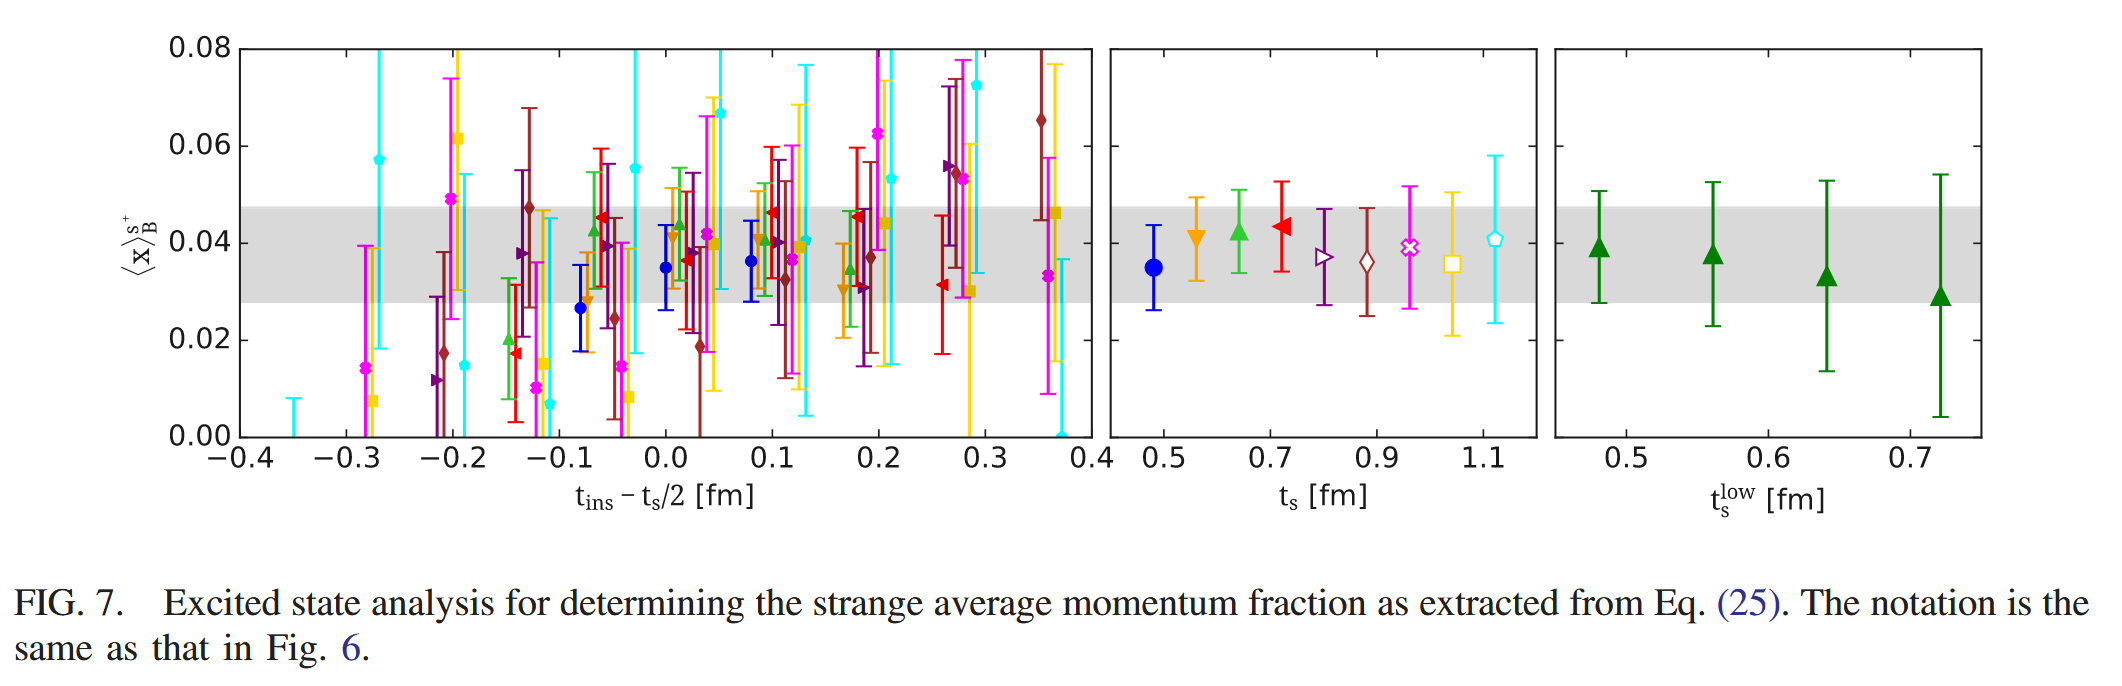